# Sparks Foundation Task-2

# Name:- Sai Sharanyya Chanda

# Iris Dataset using Unsupervised Learning

In [51]:
#Importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [52]:
#Importing Dataset
data= pd.read_csv('iris.csv')
data.set_index('Id',drop=True,inplace=True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [53]:
data.info() #to check null values and variables type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [54]:
data.describe() #give basis visualization only on numerical values

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


C:\Users\HP\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


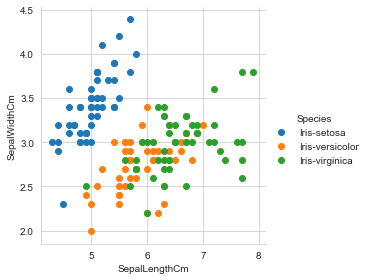

In [55]:
# 2-D Scatter plot with color-coding for each flower type/class.
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid");
sns.FacetGrid(data, hue="Species", size=4) \
   .map(plt.scatter, "SepalLengthCm","SepalWidthCm") \
   .add_legend();
plt.show();

# Notice that the blue points can be easily seperated 
# from red and green by drawing a line. 
# But red and green data points cannot be easily seperated.
# Can we draw multiple 2-D scatter plots for each combination of features?
# How many cobinations exist? 4C2 = 6.

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


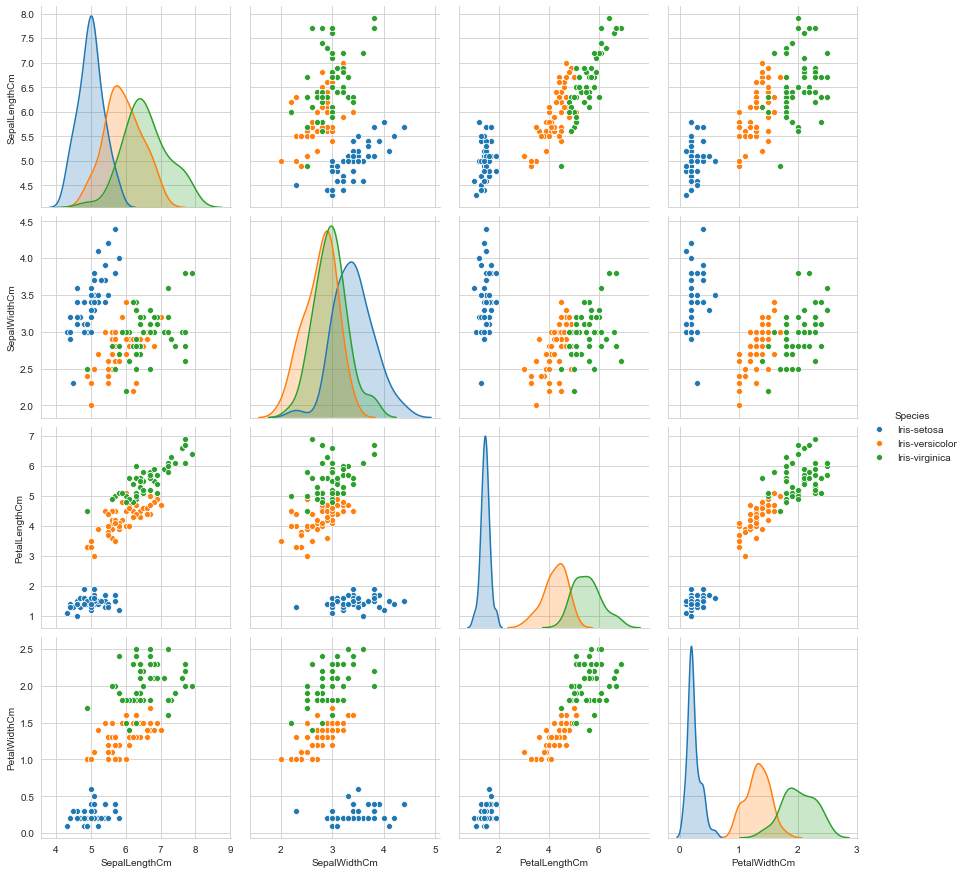

In [56]:
# pairwise scatter plot: Pair-Plot
# Dis-advantages: 
##Can be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#Only possible to view 2D patterns.
plt.close();
sns.set_style("whitegrid");
sns.pairplot(data, hue="Species", size=3);
plt.show()
# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

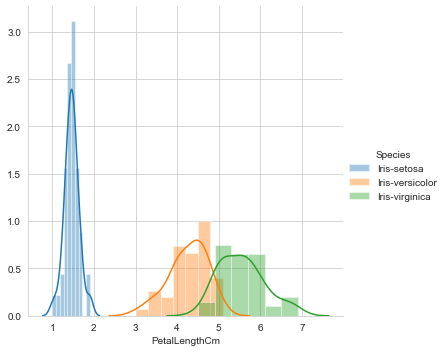

In [57]:
sns.FacetGrid(data, hue="Species", size=5) \
   .map(sns.distplot, "PetalLengthCm") \
   .add_legend();
plt.show();

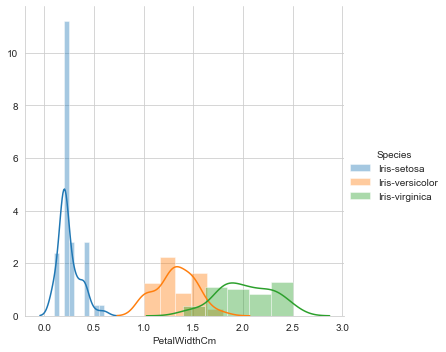

In [58]:
sns.FacetGrid(data, hue="Species", size=5) \
   .map(sns.distplot, "PetalWidthCm") \
   .add_legend();
plt.show();

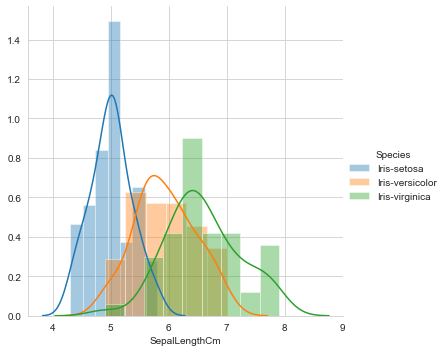

In [59]:
sns.FacetGrid(data, hue="Species", size=5) \
   .map(sns.distplot, "SepalLengthCm") \
   .add_legend();
plt.show();

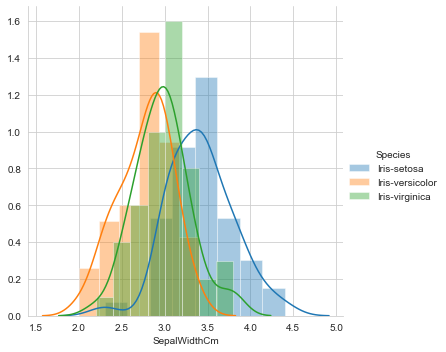

In [60]:
sns.FacetGrid(data, hue="Species", size=5) \
   .map(sns.distplot, "SepalWidthCm") \
   .add_legend();
plt.show();

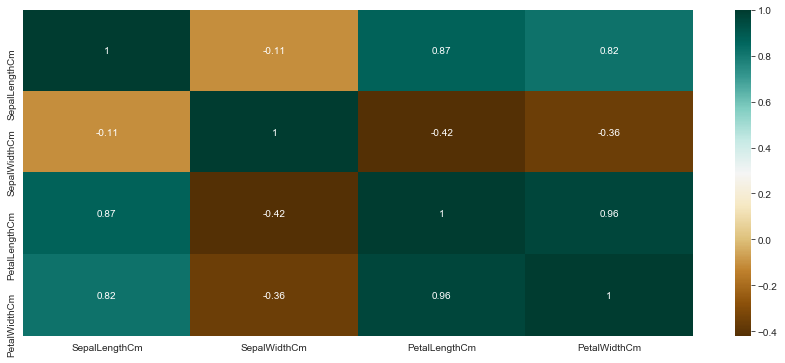

In [61]:
#HeatMap Visualization
plt.figure(figsize=(15,6))
sns.heatmap(data.corr(),annot=True,cmap="BrBG")

In [62]:
data_species=data.drop(['Species'],axis=1) #Copyong all column except "Species"
data_species.head() #return first 5 rows

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


In [63]:
X=data_species
y=data['Species']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [64]:
X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
138,6.4,3.1,5.5,1.8
85,5.4,3.0,4.5,1.5
28,5.2,3.5,1.5,0.2
128,6.1,3.0,4.9,1.8
133,6.4,2.8,5.6,2.2
...,...,...,...,...
10,4.9,3.1,1.5,0.1
104,6.3,2.9,5.6,1.8
68,5.8,2.7,4.1,1.0


In [65]:
y_train

Id
138     Iris-virginica
85     Iris-versicolor
28         Iris-setosa
128     Iris-virginica
133     Iris-virginica
            ...       
10         Iris-setosa
104     Iris-virginica
68     Iris-versicolor
118     Iris-virginica
48         Iris-setosa
Name: Species, Length: 120, dtype: object

In [66]:
print('Train input contains',X_train.shape, end=" Rows and columns")
print()
print('Test input contains', X_test.shape, end=" Rows and columns")
print()
print('Train Output Contains',y_train.shape, end=" Rows and columns") 
print()
print('Test Output Contains',y_test.shape, end=" Rows and columns")

Train input contains (120, 4) Rows and columns
Test input contains (30, 4) Rows and columns
Train Output Contains (120,) Rows and columns
Test Output Contains (30,) Rows and columns

In [67]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for test set for Logistic Regression = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for test set for Logistic Regression = 0.8


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [68]:
# to find the optimum number of clusters for K-means classification

x=data.iloc[:,[1,2,3]].values

from sklearn.cluster import KMeans
squares=[]
for i in range(1,11):
    k=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    k.fit(x)
    squares.append(k.inertia_)

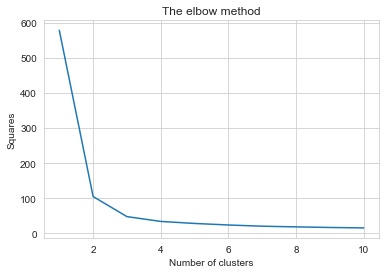

In [69]:
# To plot the results onto a 2D graph

plt.plot(range(1,11),squares)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Squares') #within cluster sum of squares
plt.show()

From the above graph it is clear that optimum clusters is at the elbow. This is when the within cluster sum of squares doesn't decrease significantly with every iteration. From this we choose the number of clusters as '3'.

In [70]:
#Applying k-means to dataset

k=KMeans(n_clusters=3,init='k-means++',max_iter=200,n_init=10,random_state=0)
y=k.fit_predict(x)

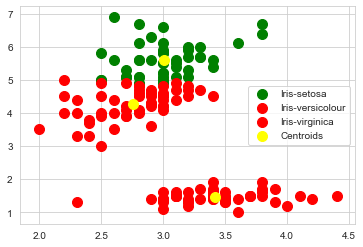

In [71]:
#Visualising the clusters

plt.scatter(x[y == 0, 0], x[y == 0, 1], 
            s = 100, c = 'green', label = 'Iris-setosa')
plt.scatter(x[y == 1, 0], x[y == 1, 1], 
            s = 100, c = 'red', label = 'Iris-versicolour')
plt.scatter(x[y == 2, 0], x[y == 2, 1],
            s = 100, c = 'red', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(k.cluster_centers_[:, 0], k.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()